In [161]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from numpy import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [163]:
'''Import the data that will be analyse'''
df = pd.read_csv('DATA/all_perth_310121.csv')

In [164]:
df.shape

(33656, 19)

In [165]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [167]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [168]:
100 * df.isnull().sum() / len(df)

ADDRESS              0.000000
SUBURB               0.000000
PRICE                0.000000
BEDROOMS             0.000000
BATHROOMS            0.000000
GARAGE               7.362729
LAND_AREA            0.000000
FLOOR_AREA           0.000000
BUILD_YEAR           9.374257
CBD_DIST             0.000000
NEAREST_STN          0.000000
NEAREST_STN_DIST     0.000000
DATE_SOLD            0.000000
POSTCODE             0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
NEAREST_SCH          0.000000
NEAREST_SCH_DIST     0.000000
NEAREST_SCH_RANK    32.541003
dtype: float64

In [169]:
sns.set_theme(style="whitegrid")

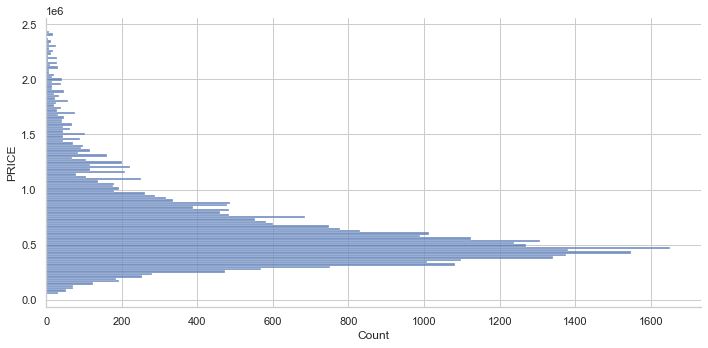

In [170]:
sns.displot(df, y='PRICE', height=5,aspect=2)

<AxesSubplot:xlabel='PRICE'>

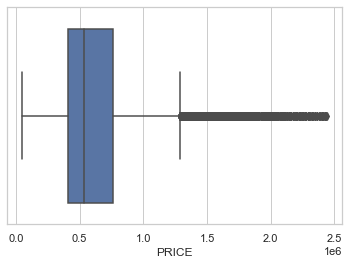

In [171]:
sns.boxplot(x=df["PRICE"])

Text(0.5, 1.0, 'Number of BEDROOMS to PRICE')

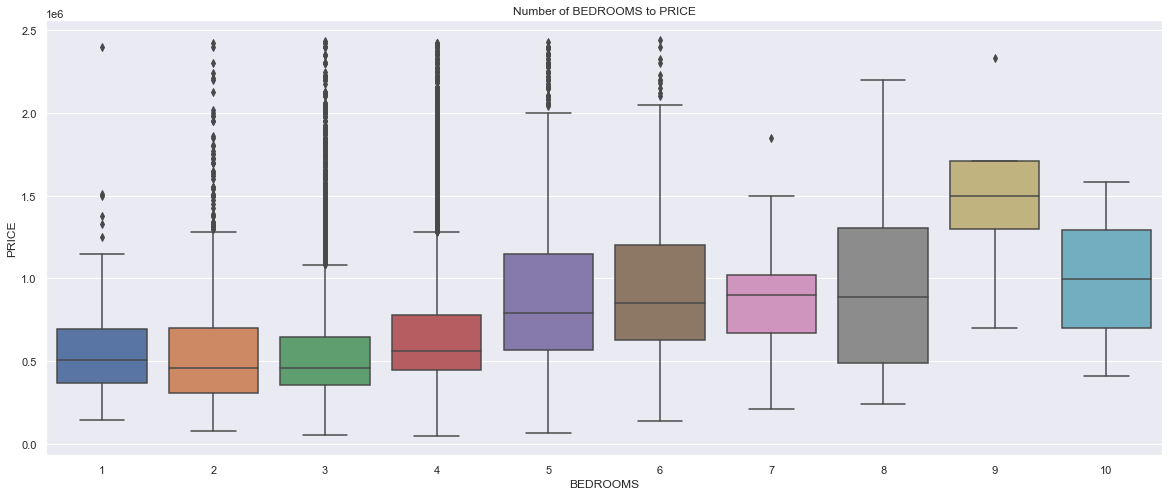

In [230]:
plt.figure(figsize=(20,8))
sns.boxplot(x="BEDROOMS", y="PRICE", data=df).set_title('Number of BEDROOMS to PRICE')

<AxesSubplot:xlabel='GARAGE'>

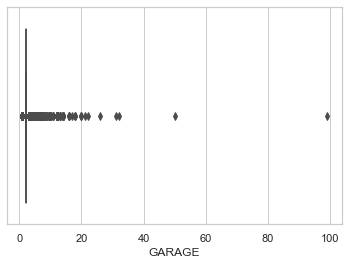

In [173]:
sns.boxplot(x=df['GARAGE'])

<AxesSubplot:xlabel='PRICE', ylabel='FLOOR_AREA'>

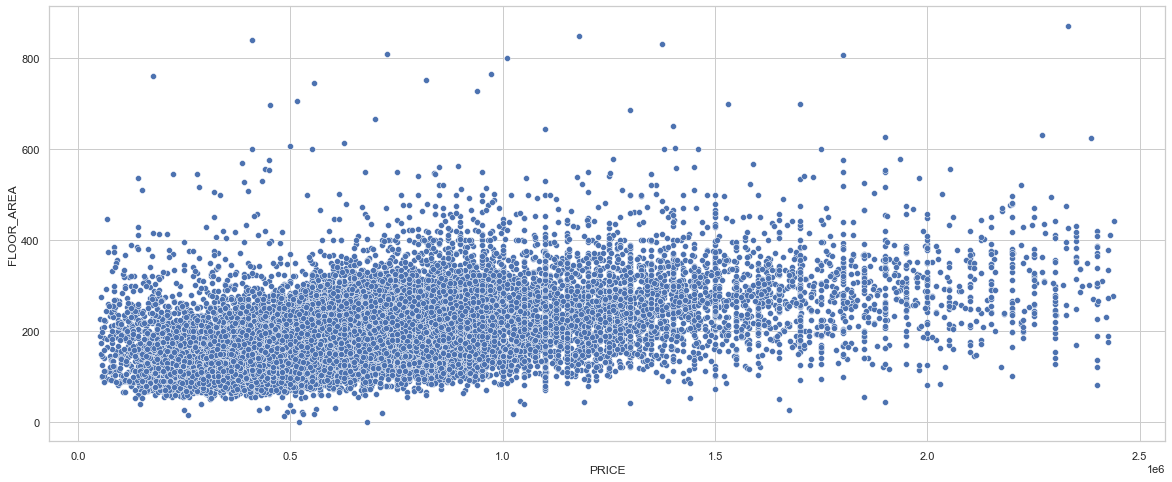

In [174]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='PRICE', y='FLOOR_AREA', data=df)

<AxesSubplot:xlabel='PRICE', ylabel='LONGITUDE'>

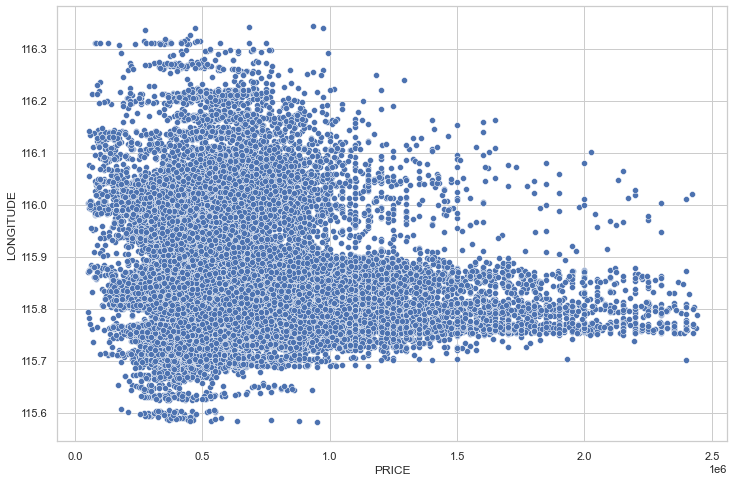

In [175]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='PRICE', y='LONGITUDE', data=df)

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

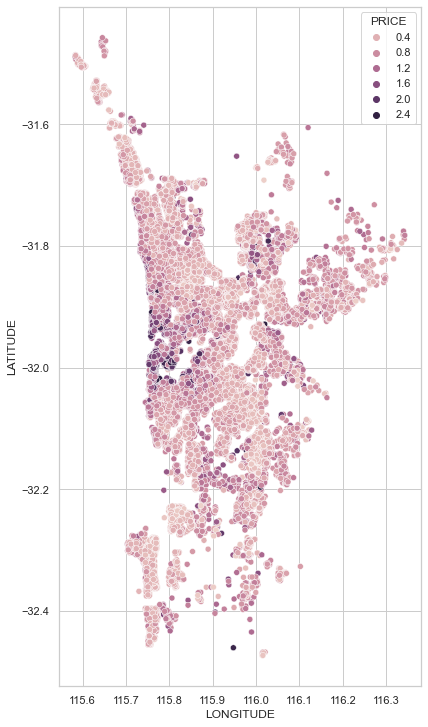

In [176]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PRICE')

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

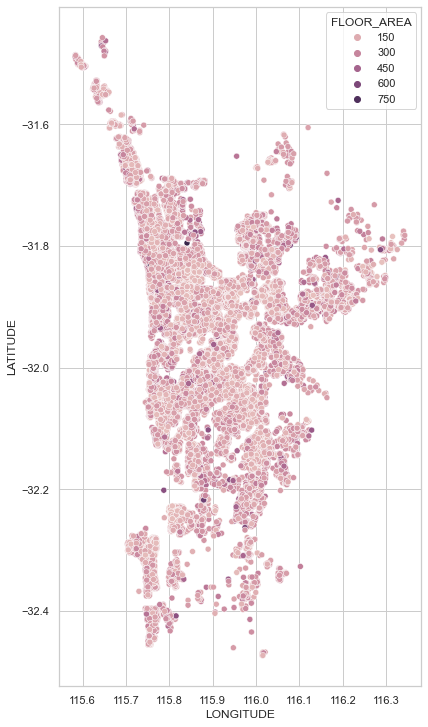

In [177]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='FLOOR_AREA')

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

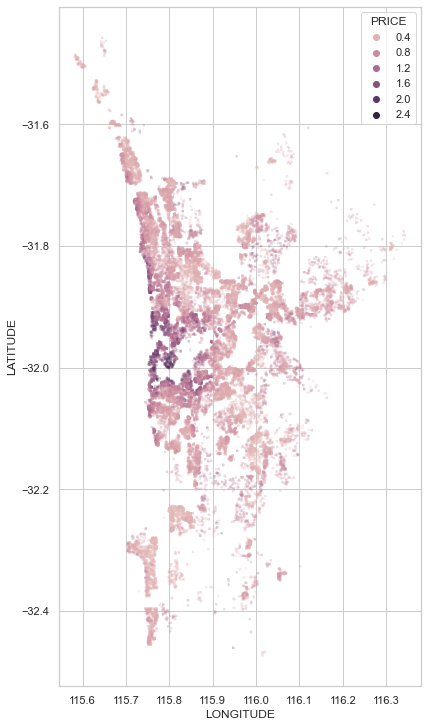

In [178]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PRICE',s=10,marker="+")

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

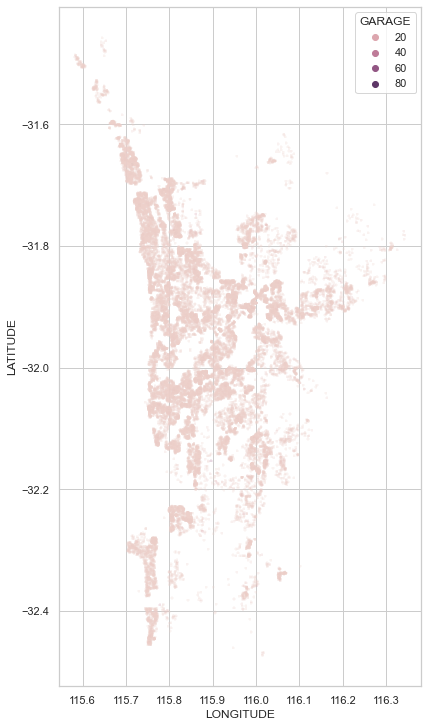

In [179]:
plt.figure(figsize=(6.5,12.5))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='GARAGE',s=10,marker="+")

In [180]:
df['GARAGE'].mean()

2.19991660786452

In [181]:
income = pd.read_csv('DATA/suburb_Weekly_income.csv')
income_index = income.set_index('Suburb')
income_dict = income_index['Weekly Income'].to_dict()
df['INCOME_SUBURB'] = df['SUBURB'].map(income_dict)

In [182]:
df[df.duplicated(keep=False)].count()

ADDRESS             0
SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN         0
NEAREST_STN_DIST    0
DATE_SOLD           0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
INCOME_SUBURB       0
dtype: int64

In [183]:
income = pd.read_csv('DATA/suburb_Weekly_income.csv')
income_index = income.set_index('Suburb')
income_dict = income_index['Weekly Income'].to_dict()
df['INCOME_SUBURB'] = df['SUBURB'].map(income_dict)

In [184]:
df['INCOME_SUBURB']

0        1850.0
1           NaN
2           NaN
3           NaN
4        1214.0
          ...  
33651    1195.0
33652    1042.0
33653    1042.0
33654    1173.0
33655    1228.0
Name: INCOME_SUBURB, Length: 33656, dtype: float64

In [185]:
df['GARAGE'] = df['GARAGE'].fillna(0)

In [186]:
df['GARAGE'].sort_values(ascending=False)

17286    99.0
30286    50.0
2122     32.0
32789    31.0
25632    26.0
         ... 
8042      0.0
21724     0.0
31040     0.0
21727     0.0
14456     0.0
Name: GARAGE, Length: 33656, dtype: float64

In [187]:
x =  df['GARAGE']

In [188]:
df['GARAGE'] = x[x.between(x.quantile(.0), x.quantile(.98))]

In [189]:
df['GARAGE'].sort_values(ascending=False)

10039    6.0
14788    6.0
29964    6.0
22970    6.0
18960    6.0
        ... 
33256    NaN
33433    NaN
33454    NaN
33505    NaN
33510    NaN
Name: GARAGE, Length: 33656, dtype: float64

In [190]:
df['GARAGE'] = df['GARAGE'].fillna(0)

In [191]:
df['GARAGE'].sort_values(ascending=False)

15130    6.0
2703     6.0
22261    6.0
8327     6.0
1241     6.0
        ... 
31496    0.0
2440     0.0
8728     0.0
25896    0.0
6272     0.0
Name: GARAGE, Length: 33656, dtype: float64

In [192]:
#Vatiance elements
df.drop(labels=['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH_RANK', 'DATE_SOLD', 'NEAREST_SCH'], axis=1,
                inplace=True)

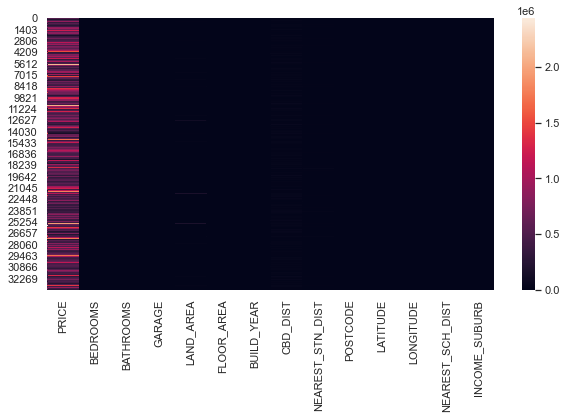

In [229]:
ax = sns.heatmap(df)

In [193]:
df.fillna(df.mean(), inplace=True)


In [194]:
sns.set(rc={'figure.figsize': (10, 5)})

X = df.drop('PRICE', axis=1).values
y = df['PRICE'].values

In [195]:
 elements = df.drop('PRICE',  axis=1).columns

In [196]:
 elements

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'INCOME_SUBURB'],
      dtype='object')

In [197]:
lasso = Lasso(alpha=1)

In [198]:
np.any(np.isnan(X))
np.any(np.isnan(y))

False

In [199]:
lasso_coef = lasso.fit(X, y).coef_

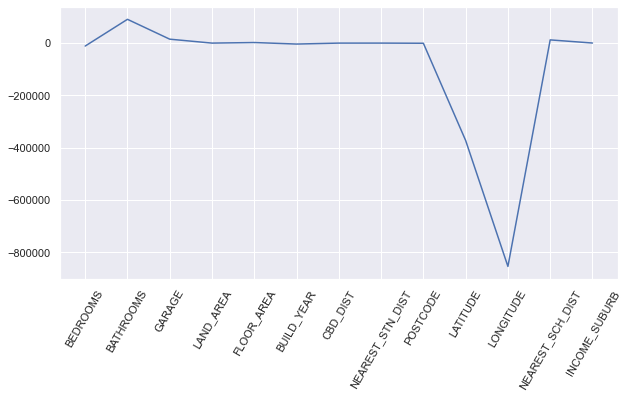

In [200]:
_ = plt.plot(range(len(elements)), lasso_coef)
_ = plt.xticks(range(len(elements)), elements, rotation=60)

In [201]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [202]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [204]:
model = keras.Sequential(
            [
            layers.Dense(336, activation='relu', name="layer1"),
            layers.Dense(168, activation='relu', name="layer2"),
            layers.Dense(84, activation='relu', name="layer3"),
            layers.Dense(42, activation='relu', name="layer4"),
            layers.Dense(21, activation='relu', name="layer5"),
            ]
        )

In [205]:
model.add(Dense(1))

In [206]:
model.compile(optimizer='adam', loss='mse')

In [207]:
 #Stop so not to overfit
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [208]:
model.fit(x=X_train, y=y_train,
                  validation_data=(X_test, y_test),
                  batch_size=128, epochs=400,
                  verbose=1,
                  callbacks=[early_stop])

Epoch 1/400
185/185 [==============================] - 1s 4ms/step - loss: 491240937317.8495 - val_loss: 68106338304.0000
Epoch 2/400
185/185 [==============================] - 0s 3ms/step - loss: 59777625847.7419 - val_loss: 53487149056.0000
Epoch 3/400
185/185 [==============================] - 1s 3ms/step - loss: 48791642376.2581 - val_loss: 47527354368.0000
Epoch 4/400
185/185 [==============================] - 0s 2ms/step - loss: 42917142219.6989 - val_loss: 44576268288.0000
Epoch 5/400
185/185 [==============================] - 1s 3ms/step - loss: 40940550672.5161 - val_loss: 43217207296.0000
Epoch 6/400
185/185 [==============================] - 0s 2ms/step - loss: 39864397427.6129 - val_loss: 42340122624.0000
Epoch 7/400
185/185 [==============================] - 1s 4ms/step - loss: 40185340124.2151 - val_loss: 41542164480.0000
Epoch 8/400
185/185 [==============================] - 1s 4ms/step - loss: 41242247542.3656 - val_loss: 41021317120.0000
Epoch 9/400
185/185 [==========

185/185 [==============================] - 0s 3ms/step - loss: 28915860557.0753 - val_loss: 30868928512.0000
Epoch 69/400
185/185 [==============================] - 0s 2ms/step - loss: 27681712623.4839 - val_loss: 30935332864.0000
Epoch 70/400
185/185 [==============================] - 0s 2ms/step - loss: 28545062889.9785 - val_loss: 30536421376.0000
Epoch 71/400
185/185 [==============================] - 0s 2ms/step - loss: 28162180261.1613 - val_loss: 30223740928.0000
Epoch 72/400
185/185 [==============================] - 0s 3ms/step - loss: 27659788772.4731 - val_loss: 31041126400.0000
Epoch 73/400
185/185 [==============================] - 1s 3ms/step - loss: 29081049132.0430 - val_loss: 30600863744.0000
Epoch 74/400
185/185 [==============================] - 0s 2ms/step - loss: 27375556431.8280 - val_loss: 30368933888.0000
Epoch 75/400
185/185 [==============================] - 0s 2ms/step - loss: 27288822288.5161 - val_loss: 30267166720.0000
Epoch 76/400
185/185 [===============

Epoch 135/400
185/185 [==============================] - 0s 2ms/step - loss: 24624881994.3226 - val_loss: 28795299840.0000
Epoch 136/400
185/185 [==============================] - 0s 2ms/step - loss: 23623396759.3979 - val_loss: 28838488064.0000
Epoch 137/400
185/185 [==============================] - 0s 2ms/step - loss: 23866401736.9462 - val_loss: 28519393280.0000
Epoch 138/400
185/185 [==============================] - 0s 2ms/step - loss: 23578996857.1183 - val_loss: 28742207488.0000
Epoch 139/400
185/185 [==============================] - 0s 2ms/step - loss: 23541834553.8064 - val_loss: 28823658496.0000
Epoch 140/400
185/185 [==============================] - 0s 2ms/step - loss: 23611378225.5484 - val_loss: 28938164224.0000
Epoch 141/400
185/185 [==============================] - 0s 2ms/step - loss: 23032638596.1290 - val_loss: 28796848128.0000
Epoch 142/400
185/185 [==============================] - 1s 3ms/step - loss: 24313454415.8280 - val_loss: 28803631104.0000
Epoch 143/400
18

185/185 [==============================] - 0s 2ms/step - loss: 21405669943.0538 - val_loss: 29369174016.0000
Epoch 202/400
185/185 [==============================] - 1s 3ms/step - loss: 21160988958.2796 - val_loss: 29766563840.0000
Epoch 203/400
185/185 [==============================] - 0s 2ms/step - loss: 22395711091.6129 - val_loss: 28364185600.0000
Epoch 204/400
185/185 [==============================] - 0s 3ms/step - loss: 21342346107.8710 - val_loss: 29783035904.0000
Epoch 205/400
185/185 [==============================] - 0s 2ms/step - loss: 21839480688.8602 - val_loss: 29421402112.0000
Epoch 206/400
185/185 [==============================] - 0s 2ms/step - loss: 21626249964.7312 - val_loss: 28543940608.0000
Epoch 207/400
185/185 [==============================] - 0s 2ms/step - loss: 21513948093.9355 - val_loss: 28340168704.0000
Epoch 208/400
185/185 [==============================] - 0s 3ms/step - loss: 22193431860.3011 - val_loss: 28340355072.0000
Epoch 209/400
185/185 [=======

<AxesSubplot:>

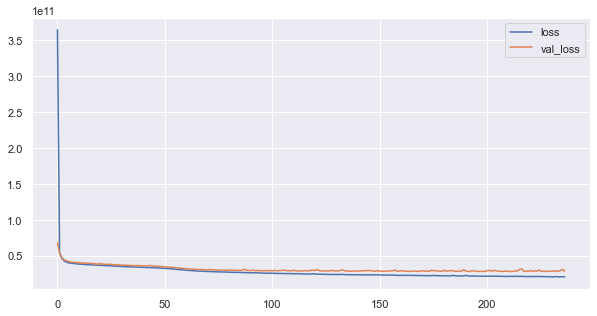

In [209]:
 losses = pd.DataFrame(model.history.history)
 losses.plot()   

In [210]:
y_pred = model.predict(X_test)

In [211]:
model.pop()

In [212]:
print(len(model.layers))

5


In [213]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 336)               4704      
_________________________________________________________________
layer2 (Dense)               (None, 168)               56616     
_________________________________________________________________
layer3 (Dense)               (None, 84)                14196     
_________________________________________________________________
layer4 (Dense)               (None, 42)                3570      
_________________________________________________________________
layer5 (Dense)               (None, 21)                903       
Total params: 79,989
Trainable params: 79,989
Non-trainable params: 0
_________________________________________________________________


In [214]:
df2 = pd.read_csv('DATA/model_results.csv').set_axis(['House row','prediction', 'actual_price', 'percent_of_actual', 'percent_from_actual'], axis=1)

In [215]:
df2.tail()

,House row,prediction,actual_price,percent_of_actual,percent_from_actual
686,20280,330246.20,370000.0,1.120376,0.107443
687,587,300621.97,300000.0,0.997931,-0.002073
688,8236,292117.20,275000.0,0.941403,-0.062244
689,6389,525156.50,510000.0,0.971139,-0.029719
690,2285,344832.62,320000.0,0.927986,-0.077602


In [216]:
df2[['House row', 'percent_from_actual']].sort_values(by='percent_from_actual', ascending=False)

,House row,percent_from_actual
57,27372,0.515034
491,4179,0.460950
23,23567,0.441656
66,11283,0.440901
323,19052,0.409153
...,...,...
268,7780,-1.651088
504,13056,-1.730021
143,6654,-3.122725
137,27088,-3.198088


<AxesSubplot:>

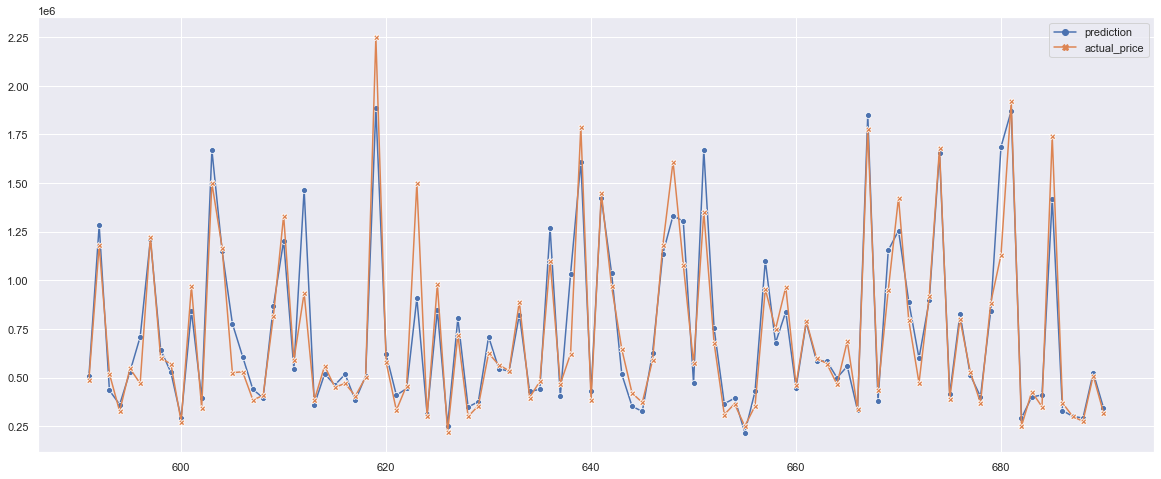

In [217]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df2[["prediction", "actual_price"]].tail(100), markers=True, dashes=False)

<AxesSubplot:ylabel='percent_from_actual'>

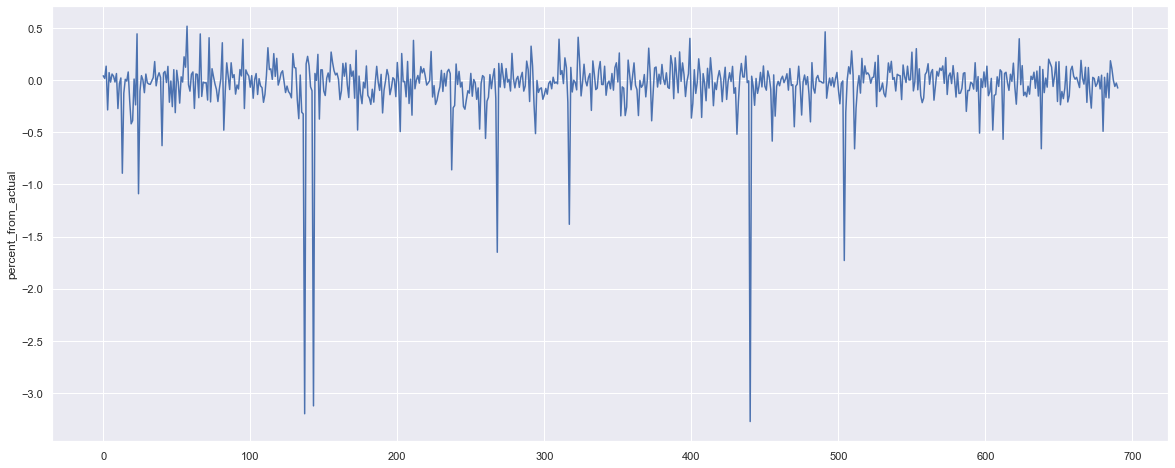

In [218]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df2["percent_from_actual"], markers=True, dashes=False)

<AxesSubplot:ylabel='percent_of_actual'>

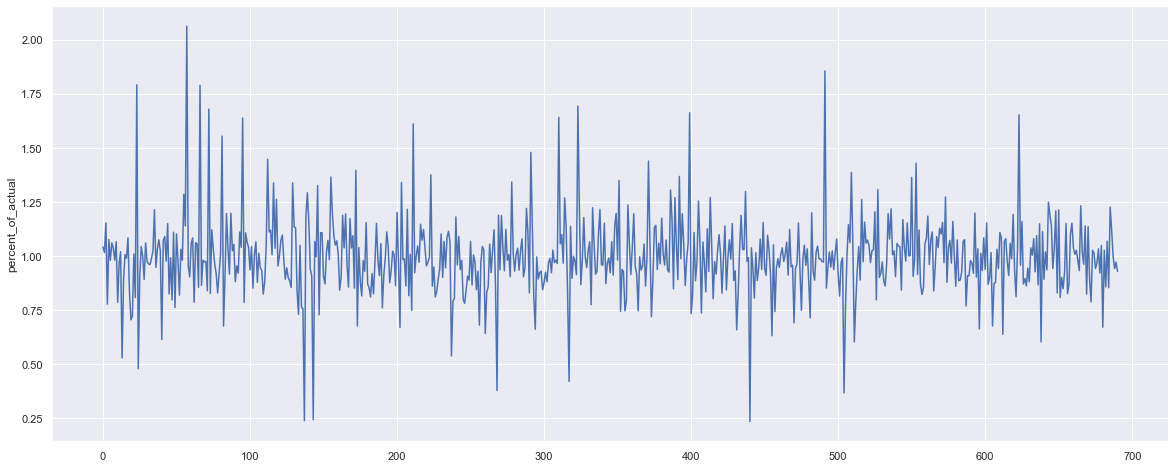

In [219]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df2["percent_of_actual"], markers=True, dashes=False)

<AxesSubplot:xlabel='actual_price', ylabel='prediction'>

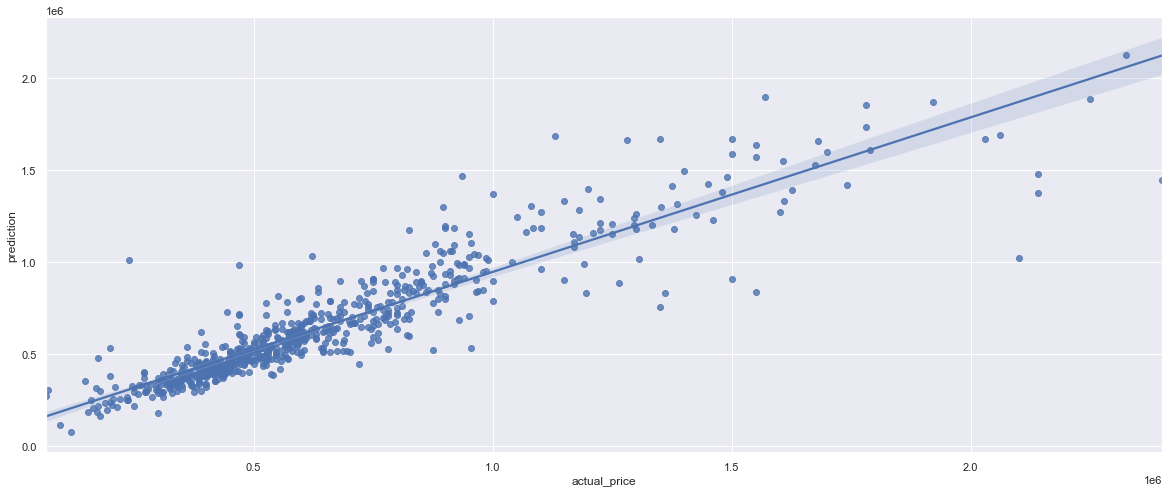

In [220]:
plt.figure(figsize=(20,8))
sns.regplot(x='actual_price', y='prediction', data=df2)


In [221]:
predictions = model.predict(X_test)

In [222]:
predictions

array([[ 543354.1 ],
       [ 441954.72],
       [ 808942.5 ],
       ...,
       [1046800.2 ],
       [ 411389.75],
       [ 508014.88]], dtype=float32)

In [223]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 102936.88201476923
MSE: 28769377745.72142
RMSE: 169615.38180755134


In [224]:
6.370720e+05

637072.0

In [225]:
170940 / 637072

0.26832132003917925

In [226]:
df['PRICE'].sort_values(ascending=False)

19255    2440000
13002    2437000
10731    2430000
26398    2425000
30675    2425000
          ...   
19042      54500
21098      54500
23030      53000
18489      52000
12509      51000
Name: PRICE, Length: 33656, dtype: int64

In [227]:
df2.head()

,House row,prediction,actual_price,percent_of_actual,percent_from_actual
0,14240,998377.60,1040000.0,1.041690,0.040022
1,1037,797609.75,810000.0,1.015534,0.015297
2,4300,295118.78,340000.0,1.152078,0.132004
3,28858,1184190.10,920000.0,0.776902,-0.287163
4,14093,585806.50,630000.0,1.075440,0.070148


In [228]:
df2['percent_from_actual'].mean()

-0.04715648687267983